In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
df_orig = pd.read_csv("diabetes.csv",sep=",")

In [7]:
df_orig.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
249,1,111,86,19,0,30.1,0.143,23,0
641,4,128,70,0,0,34.3,0.303,24,0
231,6,134,80,37,370,46.2,0.238,46,1
653,2,120,54,0,0,26.8,0.455,27,0
437,5,147,75,0,0,29.9,0.434,28,0


In [8]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df_orig.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

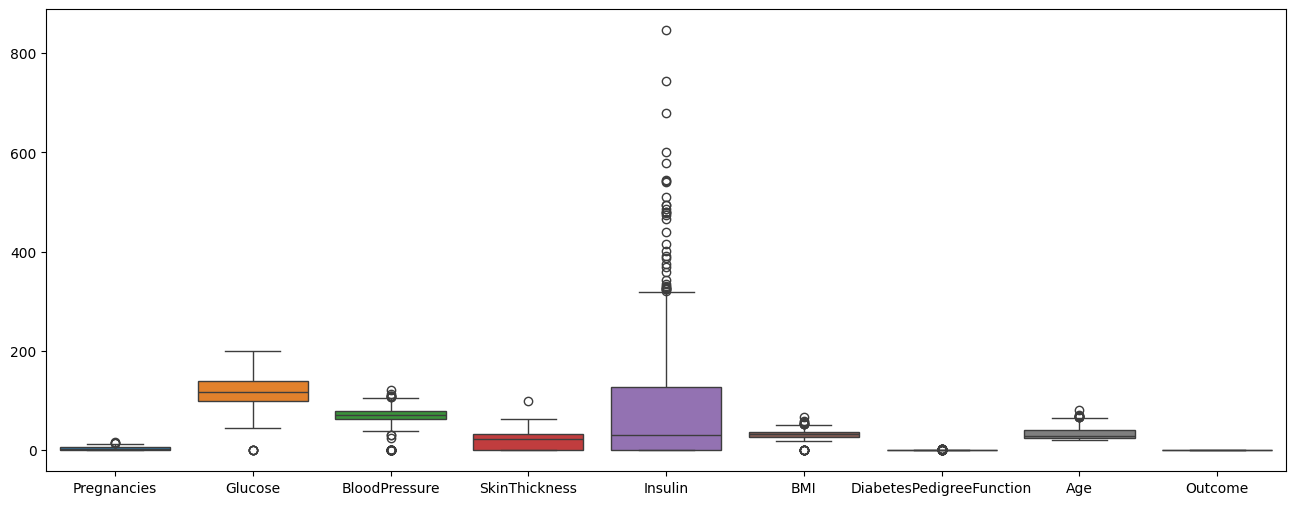

In [10]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df_orig)

# KNN DF ORIGINAL

In [11]:
colunas_orig = df_orig.drop('Outcome', axis=1)
alvo_orig = df_orig['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(colunas_orig,alvo_orig, test_size=0.2,random_state=42)

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
result_knn_orig = knn.predict(X_test)

In [15]:
score_orig = accuracy_score(y_test,result_knn_orig)
print(score_orig)

0.6623376623376623


# SVM DF ORIGINAL

In [16]:
X_train, X_test, y_train, y_test = train_test_split(colunas_orig,alvo_orig, test_size=0.2,random_state=42)

In [17]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
result_svm_orig = svm.predict(X_test)

In [19]:
score_svm_orig = accuracy_score(y_test,result_svm_orig)
print(score_svm_orig)

0.7532467532467533


# PADRONIZAÇÃO

In [20]:
obj_padrao = StandardScaler().fit(df_orig)

In [21]:
df_padrao = obj_padrao.transform(df_orig)

In [22]:
df_padrao = pd.DataFrame(df_padrao)

In [23]:
df_padrao

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [24]:
df_padrao.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [25]:
df_padrao

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


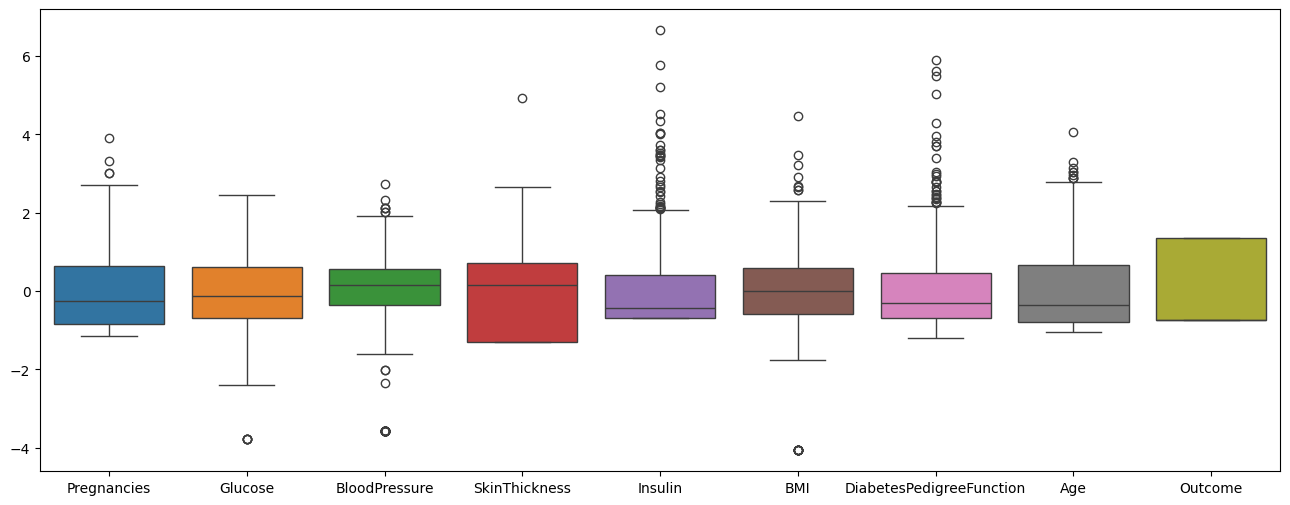

In [26]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df_padrao)

# KNN PADRONIZADO

In [27]:
colunas_padrao = df_padrao.drop('Outcome', axis=1)
alvo_orig = df_orig['Outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(colunas_padrao,alvo_orig, test_size=0.2,random_state=42)

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
result_knn_padrao = knn.predict(X_test)

In [31]:
score_padrao = accuracy_score(y_test,result_knn_padrao)
print(score_padrao)

0.6883116883116883


# SVM PADRONIZADO

In [32]:
X_train, X_test, y_train, y_test = train_test_split(colunas_padrao,alvo_orig, test_size=0.2,random_state=42)

In [33]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
result_svm_padrao = svm.predict(X_test)

In [35]:
score_svm_padrao = accuracy_score(y_test,result_svm_padrao)
print(score_svm_padrao)

0.7597402597402597


# NORMALIZAÇÃO

In [36]:
obj_normal = MinMaxScaler().fit(df_orig)

In [37]:
df_normal = obj_normal.transform(df_orig)

In [38]:
df_normal = pd.DataFrame(df_normal)
df_normal.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [39]:
df_normal

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


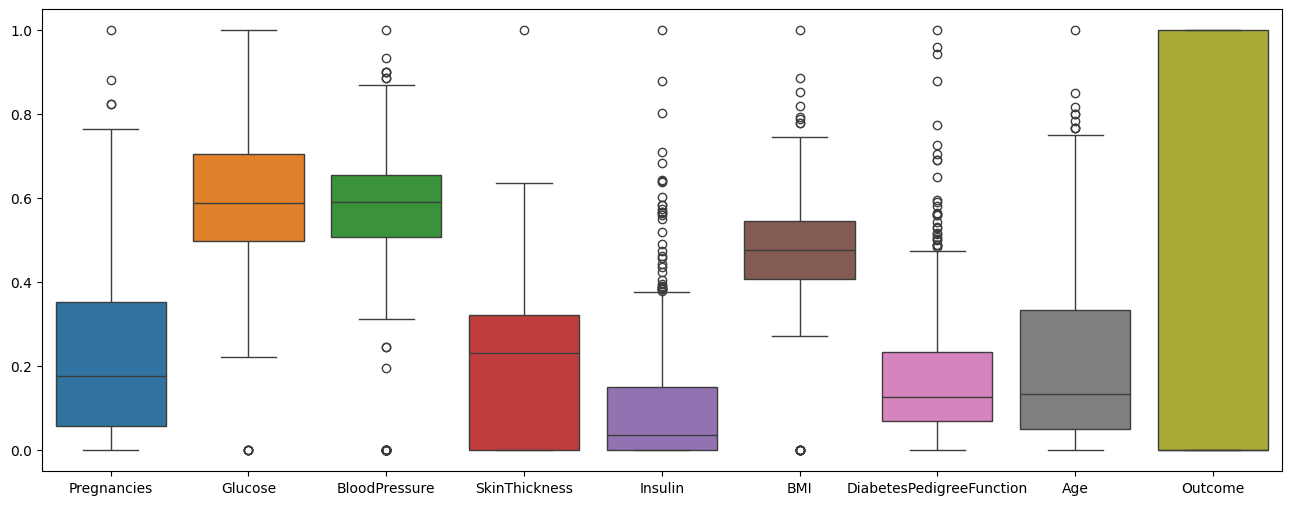

In [40]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df_normal)

# KNN NORMALIZADO

In [41]:
colunas_normal = df_normal.drop('Outcome', axis=1)
alvo_orig = df_orig['Outcome']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(colunas_normal,alvo_orig, test_size=0.2,random_state=42)

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
result_knn_normal = knn.predict(X_test)

In [45]:
score_svm_normal = accuracy_score(y_test,result_knn_normal)
print(score_svm_normal)

0.6883116883116883


# SVM NORMALIZADO

In [46]:
X_train, X_test, y_train, y_test = train_test_split(colunas_normal,alvo_orig, test_size=0.2,random_state=42)

In [47]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
result_svm_normal = svm.predict(X_test)

In [49]:
score_svm_normal = accuracy_score(y_test,result_svm_normal)
print(score_svm_normal)

0.7597402597402597


# TESTANDO COM LOGISTICREGRESSION ORIGINAL

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(colunas_padrao,alvo_orig, test_size=0.2,random_state=42)

In [52]:
logistic_regression = LogisticRegression(max_iter=1000) 

In [53]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
accuracy_score(y_train, logistic_regression.predict(X_train))

0.7703583061889251

# TESTANDO COM LOGISTICREGRESSION PADRÃO

In [55]:
X_train, X_test, y_train, y_test = train_test_split(colunas_padrao,alvo_orig, test_size=0.2,random_state=42)

In [56]:
logistic_regression = LogisticRegression(max_iter=1000) 

In [57]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
accuracy_score(y_train, logistic_regression.predict(X_train))

0.7703583061889251

# TESTANDO COM LOGISTICREGRESSION NORMALIZADO

In [59]:
X_train, X_test, y_train, y_test = train_test_split(colunas_normal,alvo_orig, test_size=0.2,random_state=42)

In [60]:
logistic_regression = LogisticRegression(max_iter=1000) 

In [61]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [62]:
accuracy_score(y_train, logistic_regression.predict(X_train))

0.754071661237785

MAIOR ACURÁCIA: 77% com LogisticRegression